In [1011]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [1012]:
df = pd.read_csv("training.csv", sep=";")
df

C:\Users\taras\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,2015-09-13,Cairns,19.2,29.1,0.0,NaN,NaN,ESE,52.0,SSE,...,56.0,1021.2,1017.4,NaN,1.0,24.8,27.2,No,8.2,Yes
70236,2015-09-14,Cairns,20.0,28.2,8.2,NaN,NaN,SE,50.0,SSE,...,62.0,1019.8,1016.4,8.0,7.0,23.6,25.7,Yes,0.0,No
70237,2015-09-15,Cairns,19.8,29.1,0.0,NaN,NaN,ESE,41.0,SSE,...,54.0,1018.7,1015.2,8.0,8.0,25.3,27.4,No,3.4,Yes
70238,2015-09-16,Cairns,18.8,28.3,3.4,NaN,NaN,SE,33.0,SSE,...,44.0,1018.9,1014.7,NaN,NaN,24.1,27.6,Yes,0.0,No


In [1013]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2013-11-20    30
2013-10-28    30
2013-10-27    30
2013-05-12    30
2013-08-14    30
              ..
2016-04-04     1
2016-04-12     1
2016-03-23     1
2016-05-28     1
2008-01-18     1
Name: Date, Length: 3120, dtype: int64


In [1014]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841,2.484011
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916,8.813653
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,0.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000,0.800000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,371.000000


In [1015]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70

Есть некоторые проблемы с Pressure9am, Pressure3pm. Приведем их к numeric

In [1016]:
df["Pressure9am"] = pd.to_numeric(df["Pressure9am"], errors='coerce')
df["Pressure3pm"] = pd.to_numeric(df["Pressure3pm"], errors='coerce')

In [1017]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
             "WindGustDir",
             "WindDir9am",
             "WindDir3pm",
             "RainToday"]

In [1018]:
True != True

False

In [1019]:
def polarangle(x, y):
        P = 3.14159265358979323846
        q = math.atan2(y, x)
        if q < 0:
            q += 2 * P
        return q

dirdi = {"N": 1,
        "NNE": 2,
        "NE": 3,
        "ENE": 4,
        "E": 5,
        "ESE": 6,
        "SE": 7,
        "SSE": 8,
        "S": 9,
        "SSW": 10,
         "SW": 11,
        "WSW": 12,
        "W": 13,
        "WNW": 14,
        "NW": 15,
        "NNW": 16 }
P = 3.14159265358979323846
def stoa(s):
    if type(s) ==  str:
        return (P * 2.5 - (dirdi[s] - 1) * P / 8) % (P * 2)
    else:
        return s

dat = ["WindDir9am", "WindDir3pm", "WindGustDir"]


def fix_WindDir(x):
    if(pd.isnull(x["WindDir9am"]) != pd.isnull(x["WindDir3pm"])):
        if(pd.isnull(x["WindDir9am"])):
            return x["WindDir3pm"]
        if(pd.isnull(x["WindDir3pm"])):
            return x["WindDir9am"]
        return np.nan

def fix_WindSpeed(x):
    if(pd.isnull(x["WindSpeed9am"]) != pd.isnull(x["WindSpeed3pm"])):
        if(pd.isnull(x["WindSpeed9am"])):
            return x["WindSpeed3pm"]
        if(pd.isnull(x["WindSpeed3pm"])):
            return x["WindSpeed9am"]
        return np.nan

def fix_WindGustDir(x):
    if (pd.isnull(x["WindGustDir"])):
        if(x["WindSpeed9am"] > x["WindSpeed3pm"]):
            return x["WindDir9am"]
        if(x["WindSpeed9am"] <= x["WindSpeed3pm"]):
            return x["WindDir3pm"]
        else:
            return np.nan
    return x["WindGustDir"]

def fix_WindGustSpeed(x):
    if (pd.isnull(x["WindGustSpeed"])):
        return max(x["WindSpeed9am"], x["WindSpeed3pm"])
    return x["WindGustSpeed"]


df.loc[df["WindDir9am"].isnull(), "WindDir9am"] = df[df["WindDir9am"].isnull()].apply(fix_WindDir, axis=1)
df.loc[df["WindDir3pm"].isnull(), "WindDir3pm"] = df[df["WindDir3pm"].isnull()].apply(fix_WindDir, axis=1)

df.loc[df["WindSpeed9am"].isnull(), "WindSpeed9am"] = df[df["WindSpeed9am"].isnull()].apply(fix_WindSpeed, axis=1)
df.loc[df["WindSpeed3pm"].isnull(), "WindSpeed3pm"] = df[df["WindSpeed3pm"].isnull()].apply(fix_WindSpeed, axis=1)

df.loc[df["WindGustDir"].isnull(), "WindGustDir"] = df[df["WindGustDir"].isnull()].apply(fix_WindGustDir, axis=1)
df.loc[df["WindGustSpeed"].isnull(), "WindGustSpeed"] = df[df["WindGustSpeed"].isnull()].apply(fix_WindGustSpeed, axis=1)

df["WindDir9am"] = df["WindDir9am"].apply(stoa)
df["WindDir3pm"] = df["WindDir3pm"].apply(stoa)
df["WindGustDir"] = df["WindGustDir"].apply(stoa)

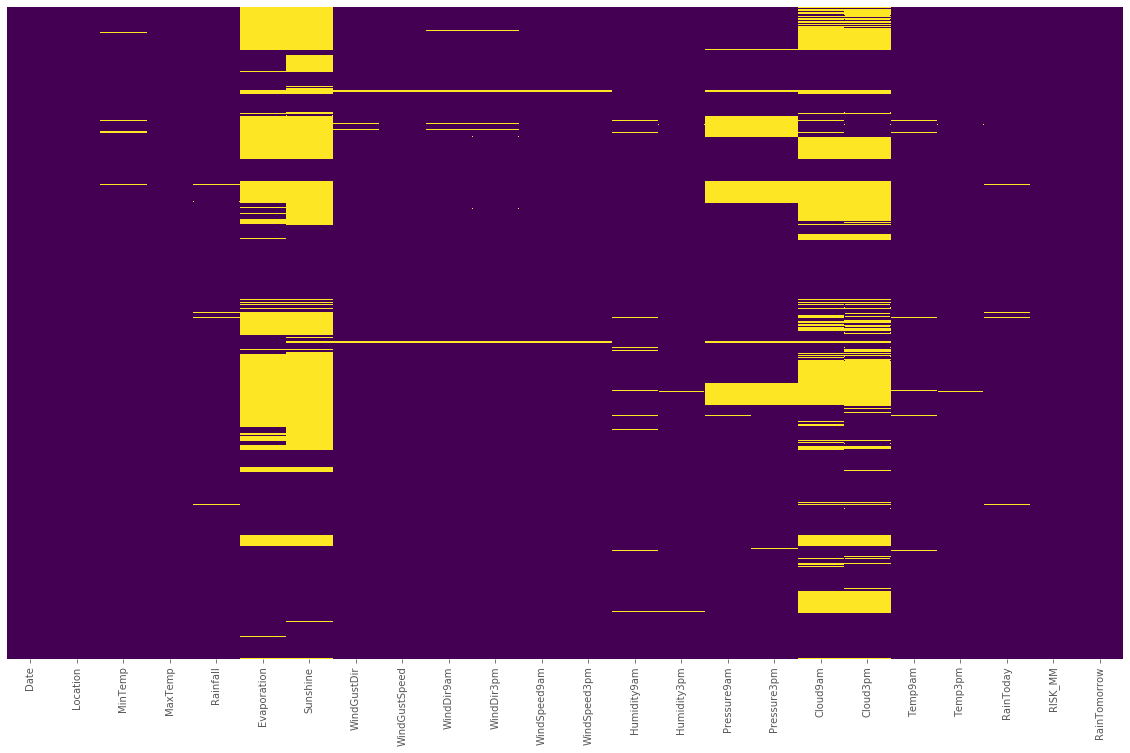

In [1020]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1021]:
df["Evaporation"].isnull().sum()

28049

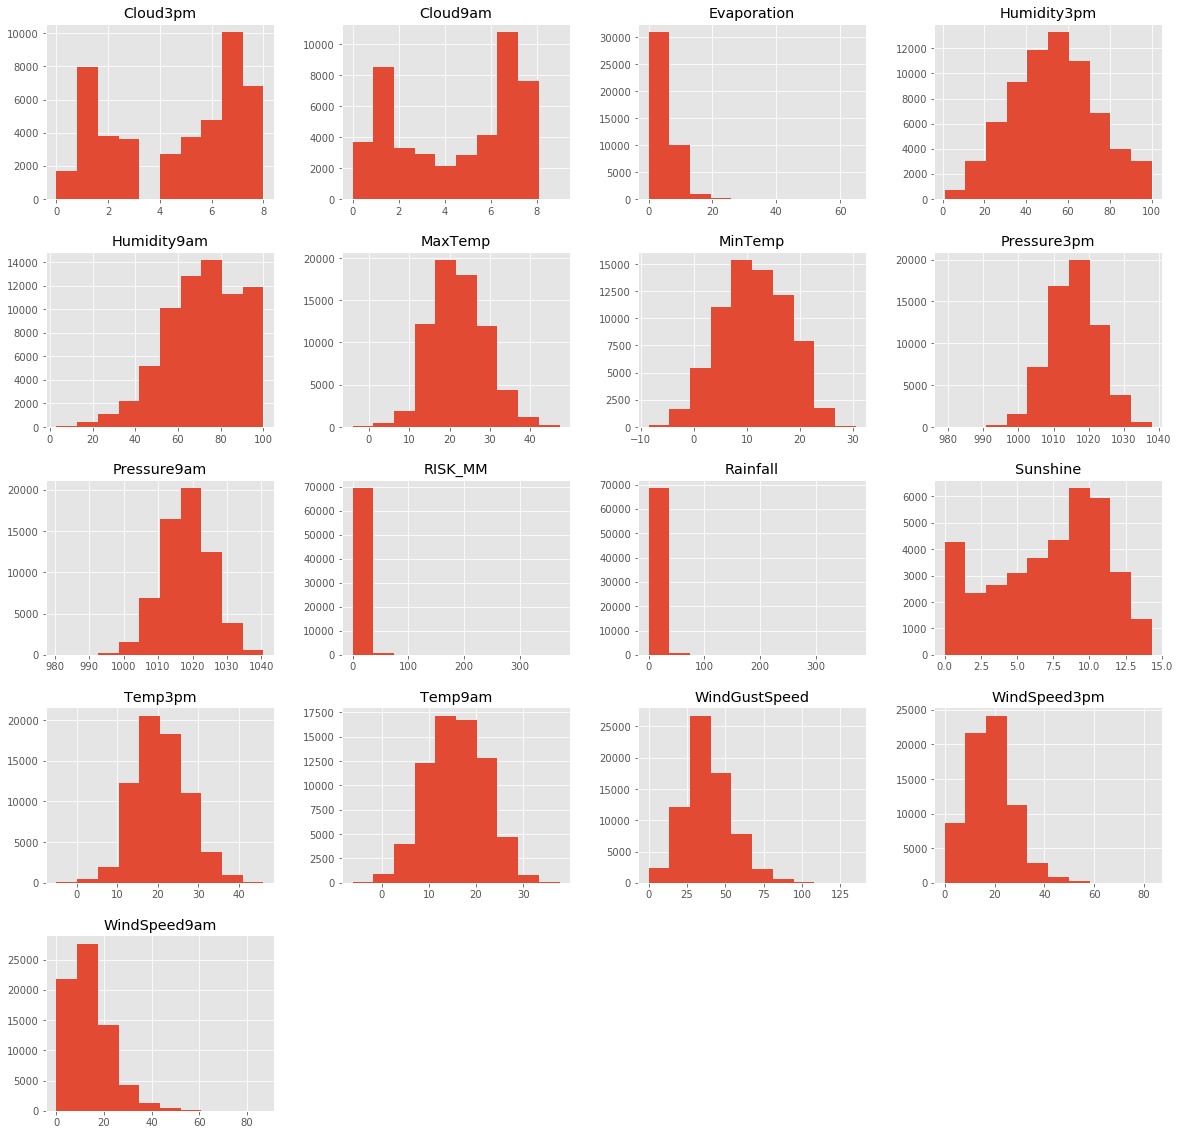

In [1022]:
df[real_vars].hist(figsize=(20, 20));

# Препроцесинг

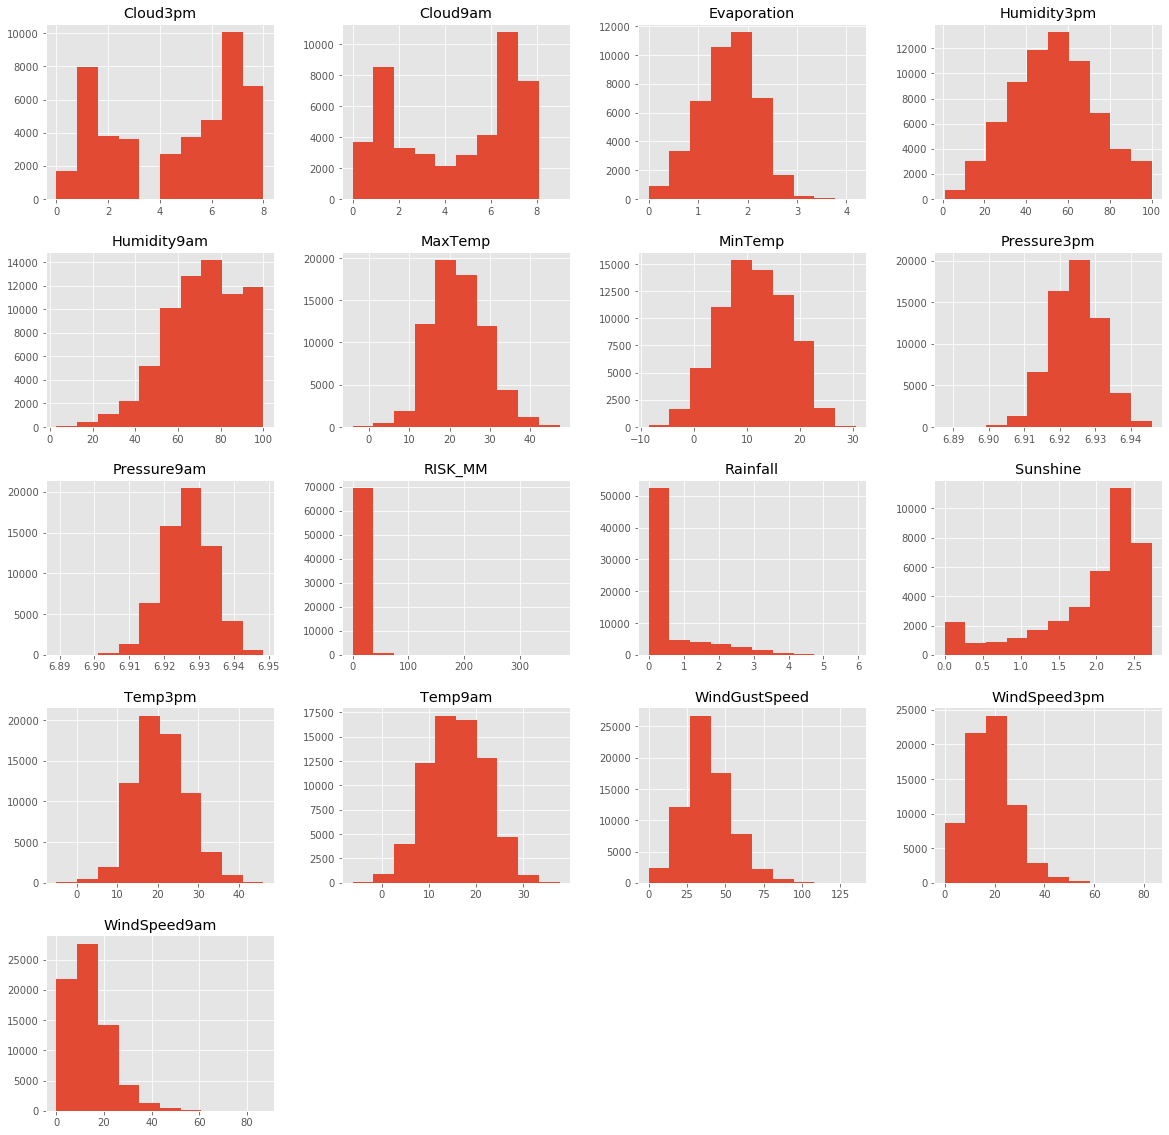

In [1023]:
#Логорифмировать
vars_to_log = ["Rainfall", "Evaporation", "Sunshine", "Pressure3pm", "Pressure9am"]
df[vars_to_log] = df[vars_to_log].apply(lambda w: np.log(w + 1))
real_vars_hist = df[real_vars].hist(figsize=(20, 20))
#Пожать категориальные 

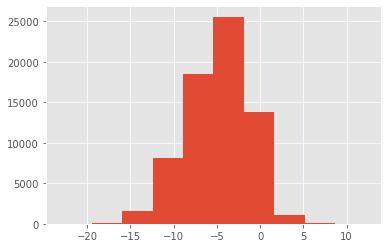

In [1024]:
(df["Temp9am"] - df["Temp3pm"]).hist()

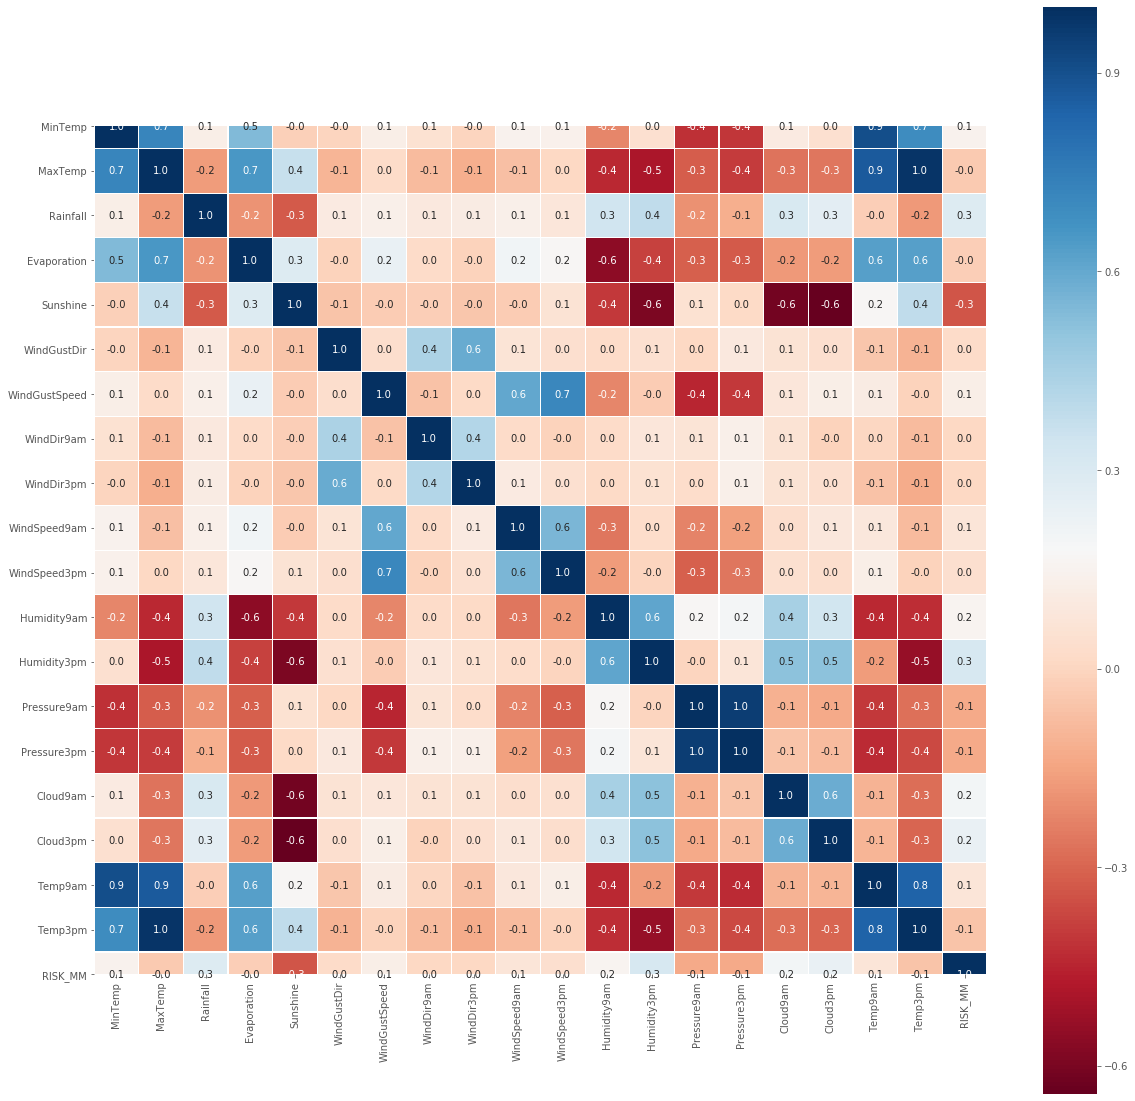

In [1025]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## Scatter coor to RISK_MM

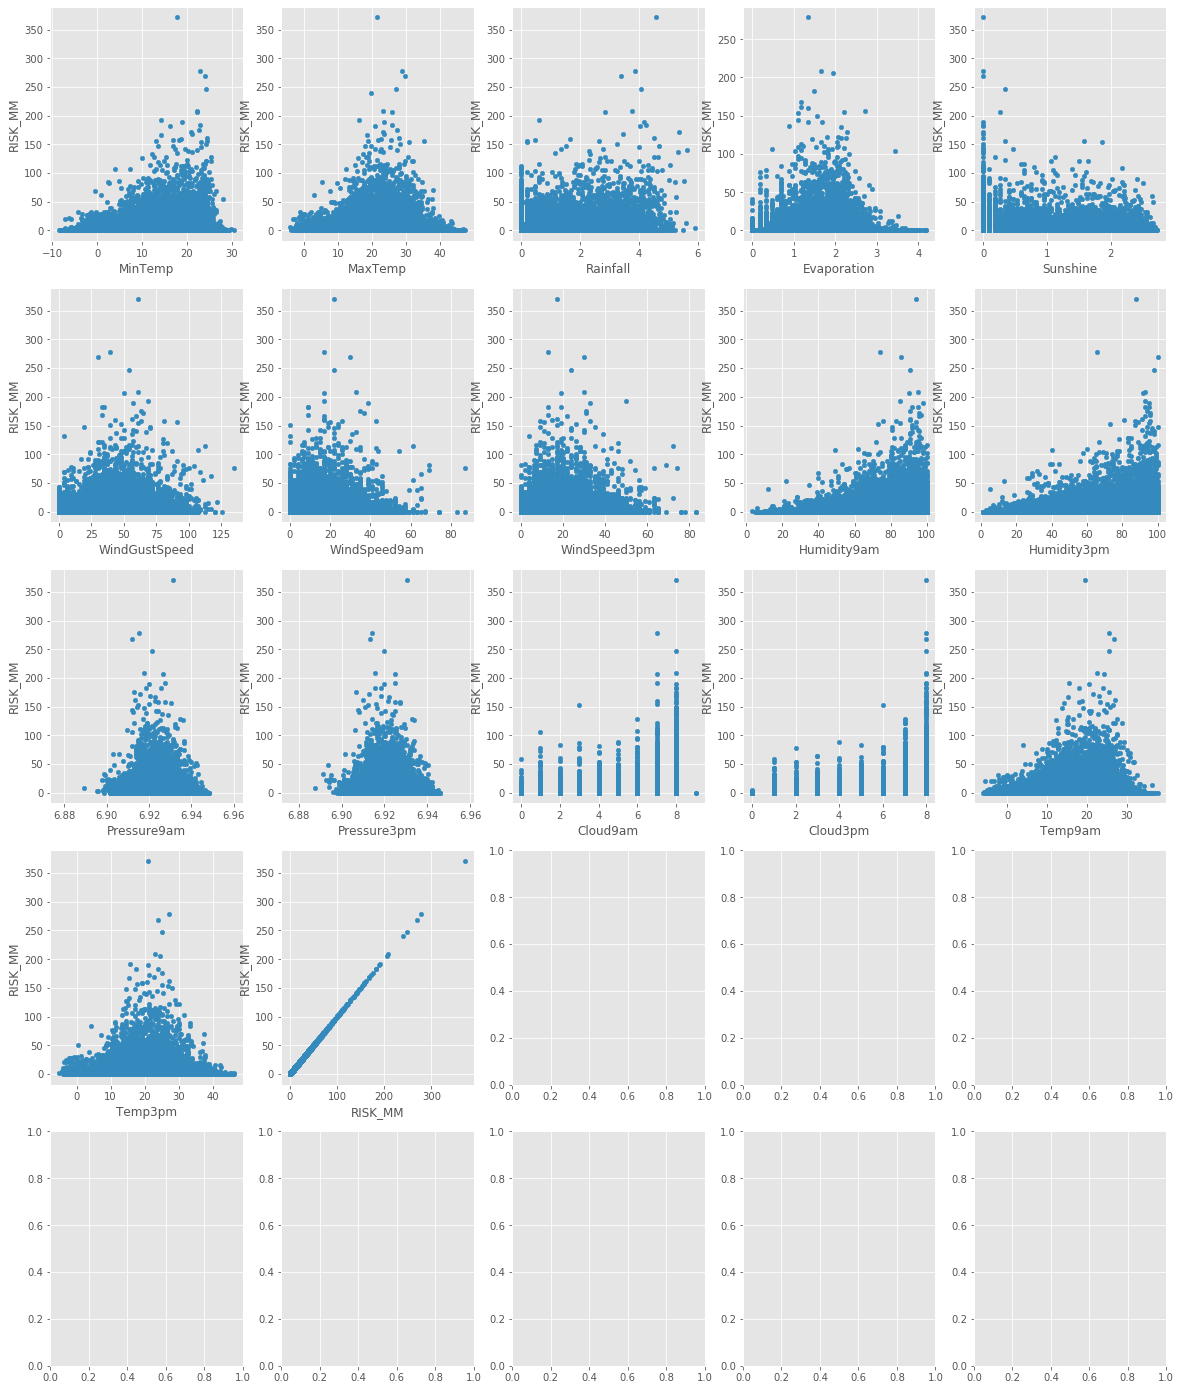

In [1026]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))

for i, feature in enumerate(df[real_vars]):
    df.plot(feature, "RISK_MM", subplots=True, kind="scatter", ax=axes[i // 5, i % 5])

# Feature extracting

## Temperature delta

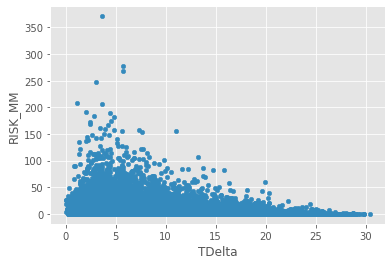

In [1027]:
df["TDelta"] = (df["MinTemp"] - df["MaxTemp"]).apply(abs)
df
df.plot("TDelta", "RISK_MM", kind="scatter")

## PressureDelta

In [1028]:
# df["PressureDelta"] = (df["Pressure9am"] - df["Pressure3pm"]).apply(abs)
# df
# df.plot("PressureDelta", "RISK_MM", kind="scatter")

## Year

In [1029]:
df['Year']=df['Date'].apply(lambda x: x[:4])
df['Year']

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
70235    2015
70236    2015
70237    2015
70238    2015
70239    2015
Name: Year, Length: 70240, dtype: object

## Season

In [1030]:
df["Month"] = df["Date"].apply(str).apply(lambda x: x[5:7]).apply(int)
df["Month"]

0        12
1        12
2        12
3        12
4        12
         ..
70235     9
70236     9
70237     9
70238     9
70239     9
Name: Month, Length: 70240, dtype: int64

In [1031]:
def monthToSeason(month):
    return month // 4
df["Season"] = df["Month"].apply(monthToSeason)
df["Season"]

0        3
1        3
2        3
3        3
4        3
        ..
70235    2
70236    2
70237    2
70238    2
70239    2
Name: Season, Length: 70240, dtype: int64

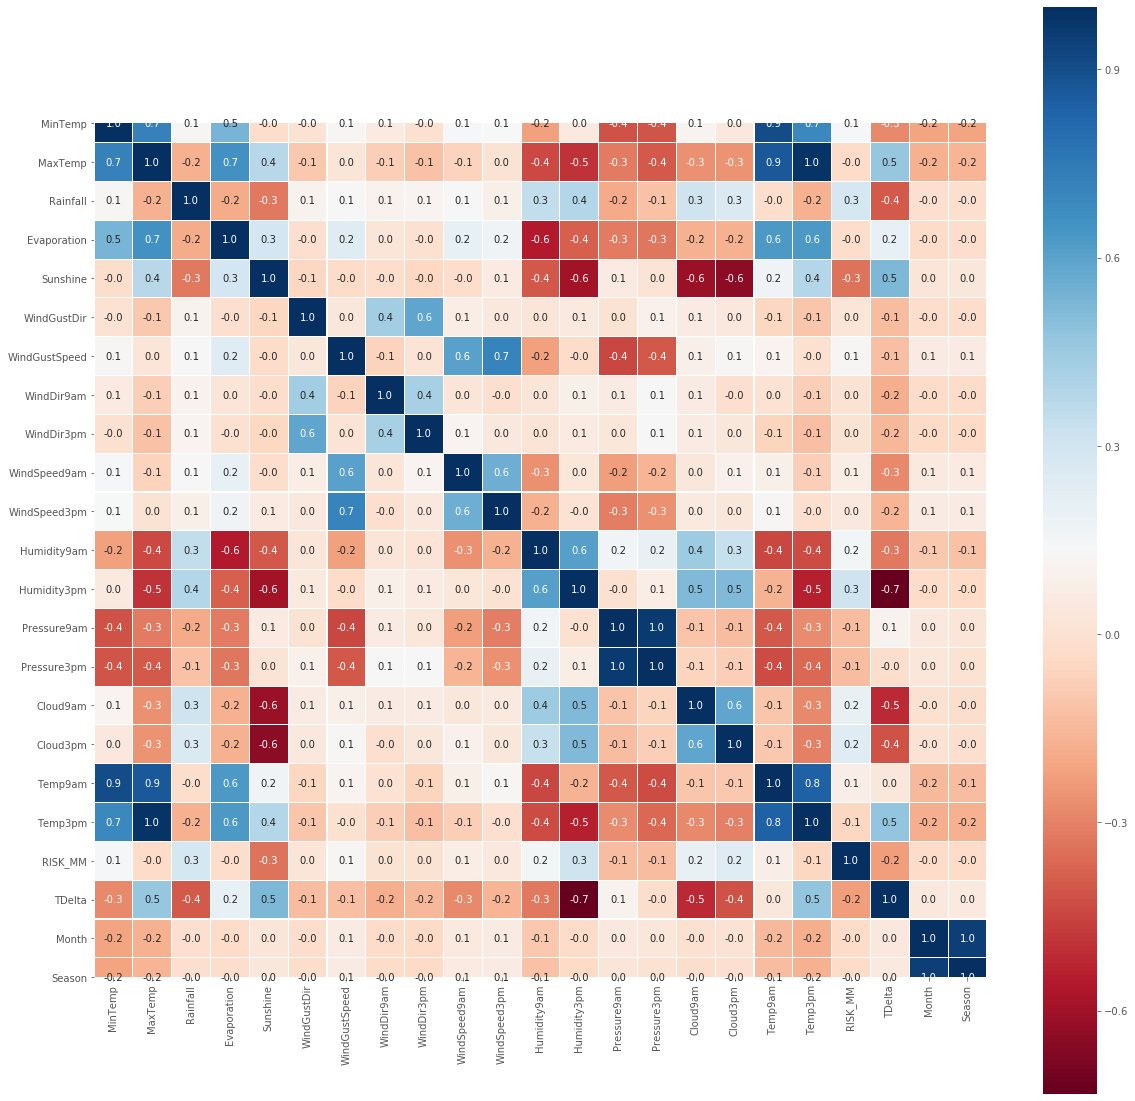

In [1032]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

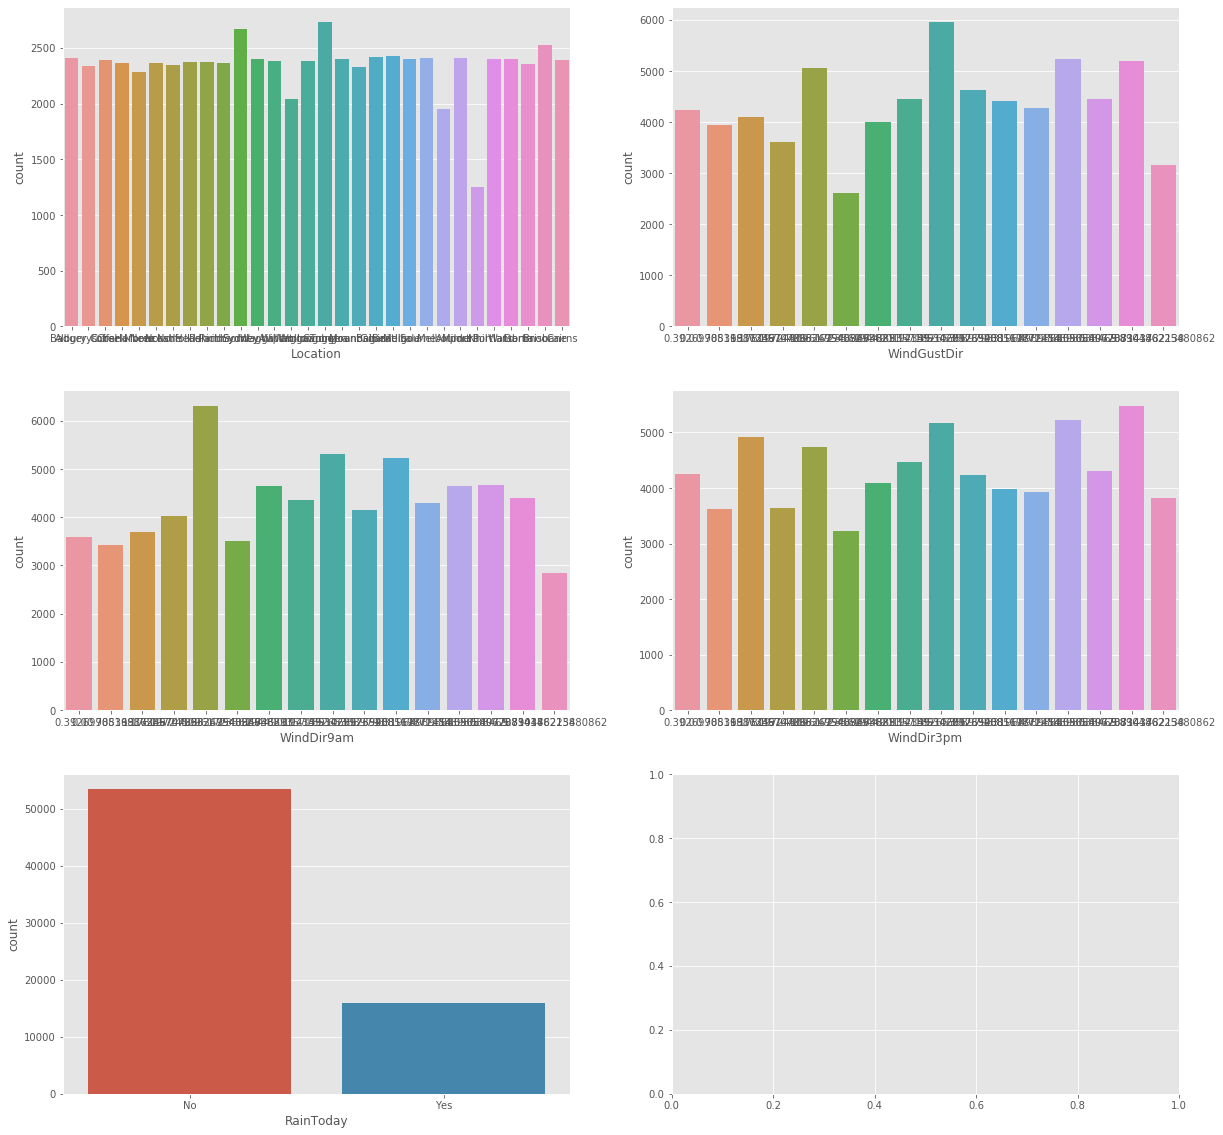

In [1033]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for i in range(len(cat_vars)):
    sns.countplot(x = cat_vars[i], data = df, ax = axes[i // 2, i % 2])

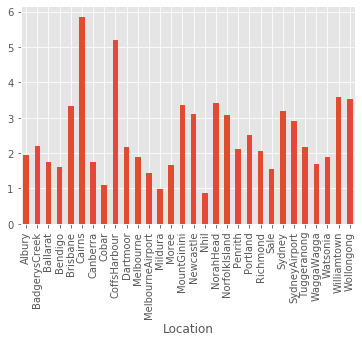

In [1034]:
df.groupby("Location").describe()["RISK_MM"]["mean"].plot.bar()

## Интересный признак)

In [1035]:
print(df[df[label] == "Yes"]["RISK_MM"].value_counts().sort_index())
print(df[df[label] == "No"]["RISK_MM"].value_counts().sort_index())

1.2      795
1.4      699
1.5        4
1.6      615
1.7        1
        ... 
240.0      1
247.2      1
268.6      1
278.4      1
371.0      1
Name: RISK_MM, Length: 514, dtype: int64
0.0    43715
0.1       51
0.2     4823
0.3        7
0.4     2007
0.5       10
0.6     1357
0.7        4
0.8     1051
0.9        2
1.0      946
Name: RISK_MM, dtype: int64


## Обработаем пропущенные значения
Как будем заполнять? Самый простой вариант, заполнить либо нулями, либо средними, медианными и т.д. значениями. Но очевидно, что влажность, кол-во солнечных дней, облачность - зависят от климматического пояса, и и имеют большую корреляцию, с этим же параметром, в этой же локации, но в предыдущем году

In [1036]:
import math
def fixByLocationAndMonth(feature, df):
    evaporationsLM = df[df[feature].isnull() == False].groupby(["Location", "Month"]).describe()[feature]["mean"]
    na_evaporation = df[df[feature].isnull()]

    def FillNAEvaporation(x):
        if (math.isnan(x[feature])):
            try:
                return evaporationsLM[(x["Location"], x["Month"])]
            except:
                try:
                    return evaporationsLM[x["Location"]].mean()
                except:
                    return df[feature].mean()
        else:
            return x[feature]
        
    df[feature] = df.apply(FillNAEvaporation, axis = 1)
    
fixByLocationAndMonth("Evaporation", df)
fixByLocationAndMonth("Sunshine", df)
fixByLocationAndMonth("Cloud9am", df)
fixByLocationAndMonth("Cloud3pm", df)

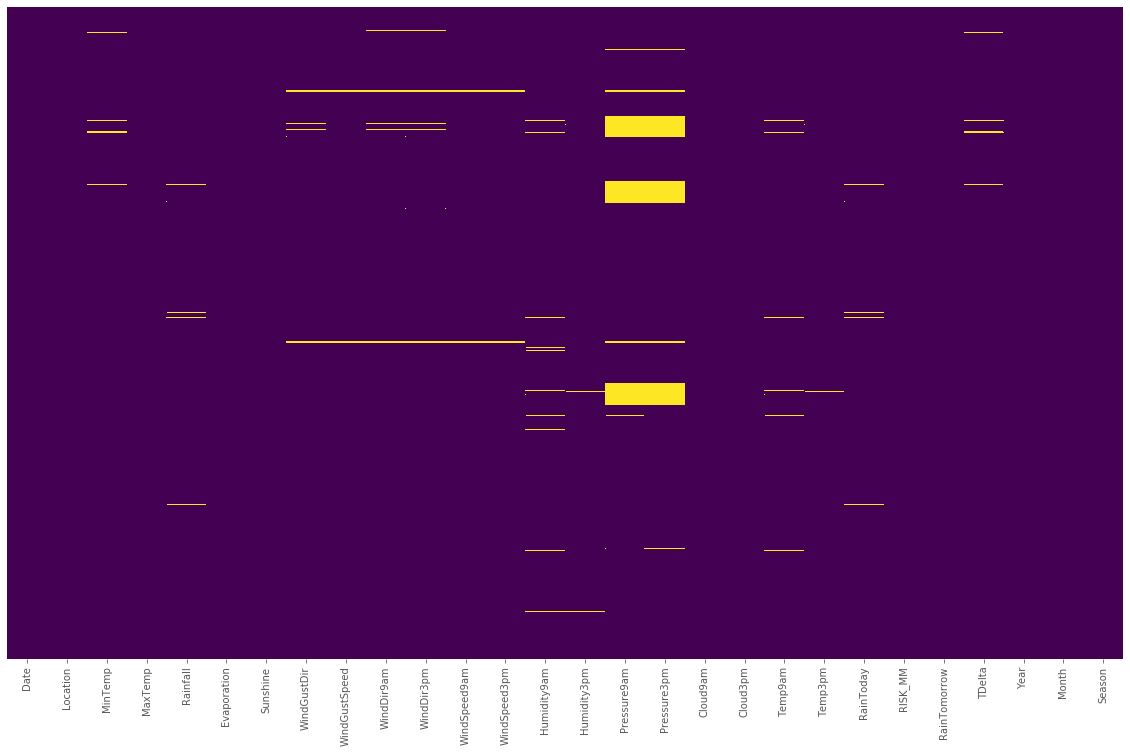

In [1037]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Удалим некоторые переменные

In [1093]:
data = df.copy()
real_vars.append("TDelta")
print(real_vars)
to_drop = ["Date", "RISK_MM", "Month", "Pressure3pm", "Pressure9am"]#, "WindDir9am", "WindDir3pm", "WindGustDir"]

data = data.drop(columns = to_drop)
print(data.shape)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'TDelta', 'TDelta']
(70240, 23)


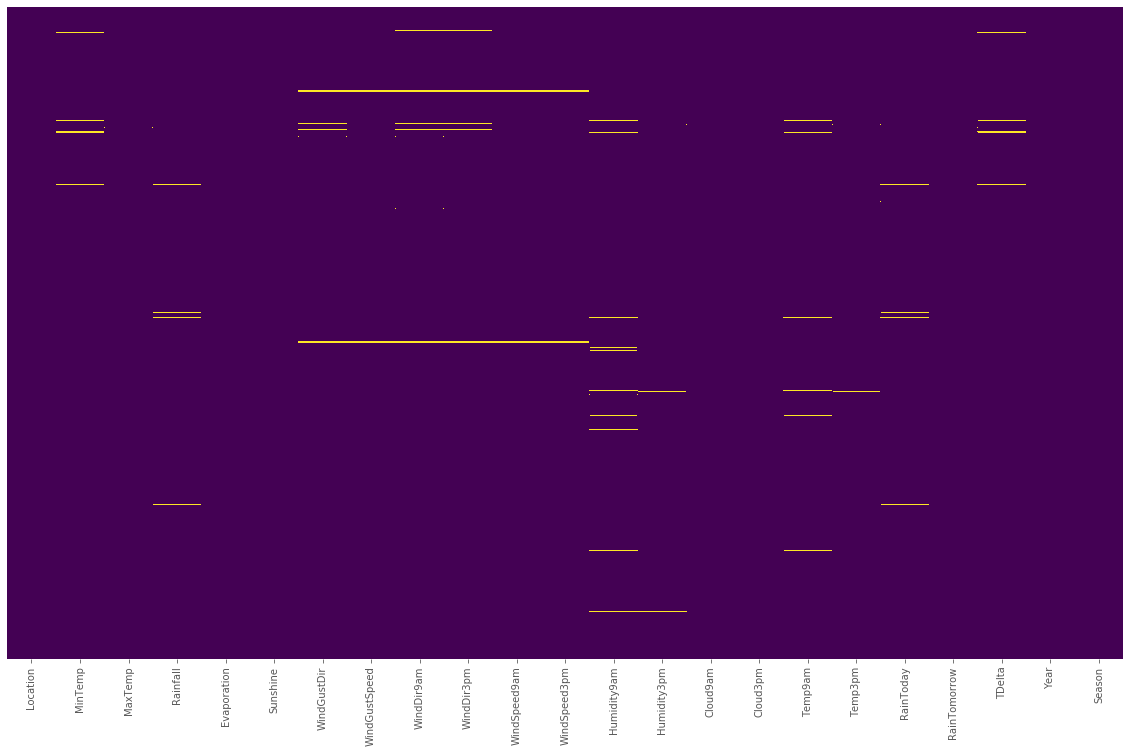

In [1094]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1095]:
data = data.dropna()
print(data.shape)

(67128, 23)


## Кластеризация

In [1096]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [1097]:
knn = KMeans(n_clusters=10)

In [1098]:
dataCL = df.copy()
dataCL['Year'] = dataCL['Date'].apply(lambda x: x[:4])

In [1099]:
group = dataCL.groupby(['Year','Location'],as_index=False)
res = group.describe()[[('MinTemp','mean'),('MaxTemp','mean'),('Rainfall','mean'),('Humidity9am','mean'),('Humidity3pm','mean')]]
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm
,mean,mean,mean,mean,mean
0,12.545902,25.086885,0.688063,69.557377,45.786885
1,13.680000,27.383333,0.497448,55.666667,33.566667
2,8.770968,21.377419,0.532592,70.677419,46.935484
3,11.035484,25.254839,0.428268,57.387097,31.709677
4,14.715934,24.993989,0.581072,61.000000,52.175824
...,...,...,...,...,...
215,8.557914,21.036331,0.385614,71.625899,46.902878
216,9.396296,19.792593,0.440674,81.841751,55.151515
217,12.827368,24.143158,0.606787,70.694737,53.038732


In [1100]:
res.fillna(0,inplace=True)

In [1101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaler.fit(res)
scaled_res = scaler.transform(res)
for_training = pd.DataFrame(scaled_res)

In [1102]:
knn.fit(for_training)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1103]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1, perplexity=30)
tsne_repr=tsne.fit_transform(scaled_res)

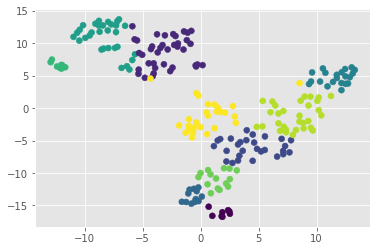

In [1104]:
import matplotlib.pyplot as plt
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = knn.labels_, cmap = 'viridis')

In [1105]:
from sklearn.cluster import AgglomerativeClustering as AGC

agc = AGC(n_clusters=6, affinity='euclidean', linkage='ward')
agc.fit(scaled_res)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

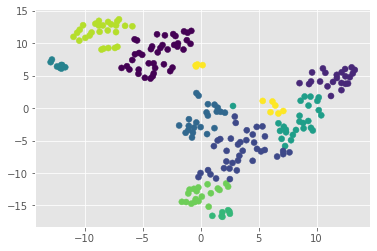

In [1106]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c = agc.labels_, cmap = 'viridis')

In [1107]:
res['label'] = agc.labels_
res

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,label
,mean,mean,mean,mean,mean,
0,12.545902,25.086885,0.688063,69.557377,45.786885,0
1,13.680000,27.383333,0.497448,55.666667,33.566667,1
2,8.770968,21.377419,0.532592,70.677419,46.935484,2
3,11.035484,25.254839,0.428268,57.387097,31.709677,1
4,14.715934,24.993989,0.581072,61.000000,52.175824,0
...,...,...,...,...,...,...
215,8.557914,21.036331,0.385614,71.625899,46.902878,5
216,9.396296,19.792593,0.440674,81.841751,55.151515,2
217,12.827368,24.143158,0.606787,70.694737,53.038732,0


In [1108]:
group = dataCL.groupby(['Year','Location'])
group.describe()

MinTemp                                                   \
                   count       mean       std  min     25%    50%     75%   
Year Location                                                               
2007 Canberra       61.0  12.545902  3.002309  6.1  10.100  12.80  15.000   
2008 Albury         30.0  13.680000  3.427415  7.4  11.625  13.40  15.900   
     Ballarat       31.0   8.770968  3.176811  2.9   6.750   8.80  10.400   
     Bendigo        31.0  11.035484  3.052600  6.2   8.550  10.80  13.250   
     Brisbane      182.0  14.715934  4.874482  3.7  11.450  14.85  18.575   
...                  ...        ...       ...  ...     ...    ...     ...   
2015 WaggaWagga    278.0   8.557914  6.590190 -3.6   3.100   7.60  13.350   
     Watsonia      297.0   9.396296  4.467324 -2.1   5.900   9.30  12.200   
     Williamtown   285.0  12.827368  4.980796  1.4   8.900  13.10  17.100   
     Wollongong    291.0  14.459794  4.165755  6.1  11.050  14.30  18.000   
2016 Nhil          226.0  10.006637  5.024067 -0.4   6.125   9.85  13.675   

                       MaxTemp             ... Month       Season            \
                   max   count       mean  ...   75%   max  count      mean   
Year Location                              ...                                
2007 Canberra     19.9    61.0  25.086885  ...  12.0  12.0   61.0  2.508197   
2008 Albury       20.5    30.0  27.383333  ...  12.0  12.0   30.0  3.000000   
     Ballarat     18.8    31.0  21.377419  ...  12.0  12.0   31.0  3.000000   
     Bendigo      17.5    31.0  25.254839  ...  12.0  12.0   31.0  3.000000   
     Brisbane     24.5   183.0  24.993989  ...  11.0  12.0  183.0  2.000000   
...                ...     ...        ...  ...   ...   ...    ...       ...   
2015 WaggaWagga   23.4   278.0  21.036331  ...   7.0  10.0  278.0  0.913669   
     Watsonia     21.6   297.0  19.792593  ...   8.0  10.0  297.0  0.986532   
     Williamtown  22.8   285.0  24.143158  ...  10.0  12.0  285.0  1.312281   
     Wollongong   22.3   291.0  20.826117  ...   8.0  10.0  291.0  0.989691   
2016 Nhil         22.5   226.0  22.212832  ...   6.0   8.0  226.0  0.663717   

                                                     
                       std  min  25%  50%  75%  max  
Year Location                                        
2007 Canberra     0.504082  2.0  2.0  3.0  3.0  3.0  
2008 Albury       0.000000  3.0  3.0  3.0  3.0  3.0  
     Ballarat     0.000000  3.0  3.0  3.0  3.0  3.0  
     Bendigo      0.000000  3.0  3.0  3.0  3.0  3.0  
     Brisbane     0.583660  1.0  2.0  2.0  2.0  3.0  
...                    ...  ...  ...  ...  ...  ...  
2015 WaggaWagga   0.745451  0.0  0.0  1.0  1.0  2.0  
     Watsonia     0.770982  0.0  0.0  1.0  2.0  2.0  
     Williamtown  0.962697  0.0  1.0  1.0  2.0  3.0  
     Wollongong   0.781177  0.0  0.0  1.0  2.0  2.0  
2016 Nhil         0.590452  0.0  0.0  1.0  1.0  2.0  

[220 rows x 184 columns]

In [1109]:
clusters_df=pd.DataFrame(group.size().reset_index(name = "Group_Count"))
clusters_df['label']=agc.labels_

## Присваиваем лейблы кластеров

In [1110]:
labelsDict = {}
for i, row in clusters_df.iterrows():
    labelsDict[(row["Year"], row["Location"])] = row["label"]
    
def get_label(x):
    return labelsDict[(x["Year"], x["Location"])]

data["Label"] = data.apply(get_label, axis = 1)

In [1111]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TDelta,Year,Season,Label
0,Albury,13.4,22.9,0.470004,1.618071,1.925790,3.141593,44.0,3.141593,2.748894,...,8.000000,4.971014,16.9,21.8,No,No,9.5,2008,3,1
1,Albury,7.4,25.1,0.000000,1.618071,1.925790,2.748894,44.0,1.963495,3.534292,...,5.229167,4.971014,17.2,24.3,No,No,17.7,2008,3,1
2,Albury,12.9,25.7,0.000000,1.618071,1.925790,3.534292,46.0,3.141593,3.534292,...,5.229167,2.000000,21.0,23.2,No,No,12.8,2008,3,1
3,Albury,9.2,28.0,0.000000,1.618071,1.925790,0.785398,24.0,5.497787,0.000000,...,5.229167,4.971014,18.1,26.5,No,No,18.8,2008,3,1
4,Albury,17.5,32.3,0.693147,1.618071,1.925790,3.141593,41.0,0.392699,2.356194,...,7.000000,8.000000,17.8,29.7,No,No,14.8,2008,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,Cairns,19.2,29.1,0.000000,2.021454,2.250715,5.890486,52.0,5.105088,5.497787,...,3.324742,1.000000,24.8,27.2,No,Yes,9.9,2015,2,4
70236,Cairns,20.0,28.2,2.219203,2.021454,2.250715,5.497787,50.0,5.105088,5.497787,...,8.000000,7.000000,23.6,25.7,Yes,No,8.2,2015,2,4
70237,Cairns,19.8,29.1,0.000000,2.021454,2.250715,5.890486,41.0,5.105088,5.497787,...,8.000000,8.000000,25.3,27.4,No,Yes,9.3,2015,2,4
70238,Cairns,18.8,28.3,1.481605,2.021454,2.250715,5.497787,33.0,5.105088,0.000000,...,3.324742,2.886010,24.1,27.6,Yes,No,9.5,2015,2,4


## one-hot encoding 

In [1112]:
data = pd.get_dummies(data, columns = ["Label", "RainToday", "Season"], dummy_na = True).drop(columns = ["Year", "Location"]).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67128 entries, 0 to 70239
Data columns (total 38 columns):
MinTemp          67128 non-null float64
MaxTemp          67128 non-null float64
Rainfall         67128 non-null float64
Evaporation      67128 non-null float64
Sunshine         67128 non-null float64
WindGustDir      67128 non-null float64
WindGustSpeed    67128 non-null float64
WindDir9am       67128 non-null float64
WindDir3pm       67128 non-null float64
WindSpeed9am     67128 non-null float64
WindSpeed3pm     67128 non-null float64
Humidity9am      67128 non-null float64
Humidity3pm      67128 non-null float64
Cloud9am         67128 non-null float64
Cloud3pm         67128 non-null float64
Temp9am          67128 non-null float64
Temp3pm          67128 non-null float64
RainTomorrow     67128 non-null object
TDelta           67128 non-null float64
Label_0.0        67128 non-null uint8
Label_1.0        67128 non-null uint8
Label_2.0        67128 non-null uint8
Label_3.0        6

## export to csv

In [1113]:
data.to_csv("training_prepared.csv")